In [1]:
#Technical Analysis Systems (Apostolos Dasilas)
#Taouktsis Xenofon (dai19312)
#Υπολογισμοί του RSI και Ανάλυση Plot
#Δεδομένα από το [investing.com]
#Τα δεδομένα (.csv) όπως τα κατεβάζουμε απευθείας από το investing.com
#Το αρχείο θα έχει όνομα συμβόλου και μετατροπή από π.χ. ETH.csv σε ETH_md.csv
#UPDATE 111220 - v6

**Relative Strength Index (RSI) Analysis**

**Εισαγωγή Functions**

In [2]:
#Βήμα 1 | Libraries Input
from google.colab import files
import pandas as pd
import numpy as np
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import re
import matplotlib.dates as mdates

In [3]:
#Βήμα 2 | Upload Dataset Function
def upload_dataset():
    data_upload = files.upload()
    filename = list(data_upload.keys())[0]
    filename = re.sub(".csv", "", filename)
    return filename

In [4]:
#Βήμα 3 | Plot Dataset Function
def plot_dataset(dataset):
    plt.style.use('fivethirtyeight')
    symbol_name = re.sub("_md", "", filename)
    resize_figure = plt.figure(figsize=(12.5,5))
    #start_date = dataset['Date'].iloc[0]
    #end_date = dataset['Date'].iloc[-1]
    dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))

    plt.plot(dataset['Price'], label = symbol_name, alpha = 0.80, color = 'violet')

    plt.title('Symbol: ' + symbol_name + ' [Price History]')
    #plt.xlabel('{} to {}'.format(start_date, end_date))
    plt.ylabel('Price USD ($)')
    #plt.legend()
    return plt.show()

In [5]:
#Βήμα 4 | RSI Dataset Calculation and Plot Function
def rsi_indicator(dataset):

    dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))

    dd = dataset['Price'].diff(1)
    dd = dd.dropna()
    up_values =  dd.copy()
    down_values = dd.copy()
    up_values[up_values < 0] = 0
    down_values[down_values > 0] = 0
    period_value = 14
    average_gain = up_values.rolling(window=period_value).mean()
    average_loss = abs(down_values.rolling(window=period_value).mean())
    rs_value = average_gain / average_loss
    rsi_value = 100 - (100/ (1 + rs_value))

    #RSI VALUES PLOT
    dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))
    plt.style.use('fivethirtyeight')
    resize_figure = plt.figure(figsize=(12.5,5))
    symbol_name = re.sub("_md", "", filename)
    #start_date = dataset['Date'].iloc[0]
    #end_date = dataset['Date'].iloc[-1]
    plt.plot(rsi_value, label = symbol_name, alpha = 0.80, color = 'violet')
    plt.title('Symbol: ' + symbol_name + ' [RSI PLOT]')
    #plt.xlabel('{} to {}'.format(start_date, end_date))
    plt.ylabel('RSI Values (0 - 100)')
    plt.show()

    return rsi_value

In [6]:
#Βήμα 5 | Total Plot PRICE VALUE and RSI RESULTS
def total_plot_rsi(dataset,rsi_result):
      plt.style.use('fivethirtyeight')
      resize_figure = plt.figure(figsize=(13,5))

      symbol_name = re.sub("_md", "", filename)
      #start_date = dataset['Date'].iloc[0]
      #end_date = dataset['Date'].iloc[-1]
      dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))

      #Dataset Price Plot
      plt.plot(dataset['Price'], label = symbol_name, alpha = 0.80, color = 'violet')
      plt.title('Symbol: ' + symbol_name + ' [Price History]')
      plt.ylabel('Price USD ($)')
      plt.tight_layout()
      plt.show()

      #RSI PLOT with Lines 0-100
      resize_figure = plt.figure(figsize=(13,5))
      plt.plot(rsi_result, label = symbol_name, alpha = 0.80, color = 'violet')

      plt.axhline(30, linestyle='dotted',color = 'forestgreen')
      plt.axhline(70, linestyle='dotted', color = 'red')

      plt.title('RSI PLOT')
      #plt.xlabel('{} to {}'.format(start_date, end_date))
      plt.ylabel('RSI Values (0 - 100)')
      plt.tight_layout()
      plt.show()
      return

In [7]:
#Βήμα 6 | RSI SIGNALS Buy or Sell
def rsi_signals_buy_sell(dataset,rsi_result):
  signal_rsi = "nothing"
  signals_rsi = []
  for i in range(len(rsi_result)):
          if rsi_result[i] < 30:
                    signal_rsi = 'buy'
          elif rsi_result[i] > 70:
                    signal_rsi = 'sell'
          else:
                   signal_rsi = "nothing"
          signals_rsi.append(signal_rsi)
  rsi_signals_report = pd.DataFrame()
  rsi_signals_report["RSI_VALUES"] = rsi_result
  rsi_signals_report["SIGNALS"] = signals_rsi
  dates_to_buy = rsi_signals_report.loc[rsi_signals_report['SIGNALS']=='buy']
  dates_to_sell = rsi_signals_report.loc[rsi_signals_report['SIGNALS']=='sell']
  return dates_to_buy,dates_to_sell

**Απευθείας CSV to CSV_md - INVESTING.COM**

In [8]:
#Βήμα SOS
#Direct CSV to CSV_md (investing.com)
def md_csv_dataset(filename):
    chart = pd.read_csv(filename+".csv",
                        sep = ',')
    n_col = len(chart.columns)
    chart = chart.drop(chart.columns[n_col-1],axis=1)

    if len(chart.columns) < 6 :
        chart['Volume'] = 0
        id = 1
    else :
        id = 0

    chart.columns = ['Date','Price',
                    'Open','High',
                    'Low','Volume']

    #Μορφή Ημερομηνίας
    chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')

    chart = chart.replace(',','', regex=True)
    chart = chart.replace('%','', regex=True)
    chart.iloc[:,1:6] = chart.iloc[:,1:6].replace('-','0', regex=True)

    chart['Date'] = chart['Date'].astype(np.datetime64)
    chart['Date'] = chart['Date'].dt.date
    chart['Price'] = chart['Price'].astype(np.float64)
    chart['Open'] = chart['Open'].astype(np.float64)
    chart['High'] = chart['High'].astype(np.float64)
    chart['Low'] = chart['Low'].astype(np.float64)

    if id!=1:
        for i in range(len(chart)):
            tmp_value = chart.iloc[i,5]
            if tmp_value != re.sub("K", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("K", "",tmp_value)) * 1000
            elif tmp_value != re.sub("M", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("M", "",tmp_value)) * 1000000
            elif  tmp_value != re.sub("B", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("B", "",tmp_value)) * 1000000000
        chart['Volume'] = chart['Volume'].astype(np.float64)
    else:
        #update 111220
        chart['Volume'] = 0 #Υπήρχε θέμα με το volume οπότε το θέτω με μηδέν ( 0 ) όταν δεν υπάρχει η στήλη από το investing.com
        #md_col = len(chart.columns)
        #chart = chart.drop(chart.columns[md_col-1],axis=1)

    chart.sort_values(by=['Date'], inplace=True, ascending=True)

    #update 081220
    chart.index = range(len(chart['Date']))

    return chart

**Αρχή Διαδικασιών RSI**

In [9]:
#Βήμα 1 | Upload .csv Dataset (.csv)
filename = upload_dataset()
filename
#Το αποτέλεσμα θα είναι π.χ. filename = "AAPL"

Saving INTC Ιστορικά Δεδομένα.csv to INTC Ιστορικά Δεδομένα.csv


'INTC Ιστορικά Δεδομένα'

In [10]:
#Βήμα 2 | Creation of Dataset (load .csv file)
#Επιλογές Υποδιαστολής
#American xlsx επιλογή decimal_select = '.' εάν το csv έχει αποθηκευτεί με ( . )
#European xlsx επιλογή decimal_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#Επιλογή Διαχωρισμού Στηλών
#European xlsx sep_select = ';' εάν το csv έχει αποθηκευτεί με ( ; )
#American xlsx sep_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#decimal_select = ',' #Υποδιαστολή
#sep_select = ';' #Διαχωρισμός Στηλών

dataset = md_csv_dataset(filename)
dataset

<ipython-input-8-052c46b199ca>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')


Date   Price    Open    High     Low        Volume
0    2022-01-11  2830.0  2880.0  2885.0  2789.0  4.442000e+09
1    2022-01-12  2983.0  3024.0  3048.0  2952.0  3.890000e+09
2    2022-02-11  2742.0  2827.0  2885.0  2741.0  5.196000e+09
3    2022-02-12  2941.0  2917.0  2943.0  2871.0  3.155000e+09
4    2022-03-11  2739.0  2745.0  2788.0  2717.0  3.968000e+09
..          ...     ...     ...     ...     ...           ...
247  2023-12-05  2895.0  2902.0  2910.0  2872.0  2.415000e+09
248  2023-12-06  3307.0  3140.0  3330.0  3136.0  5.967000e+09
249  2023-12-07  3398.0  3369.0  3408.0  3306.0  3.728000e+09
250  2023-12-09  3886.0  3865.0  4007.0  3865.0  5.465000e+09
251  2023-12-10  3684.0  3680.0  3722.0  3639.0  2.356000e+09

[252 rows x 6 columns]

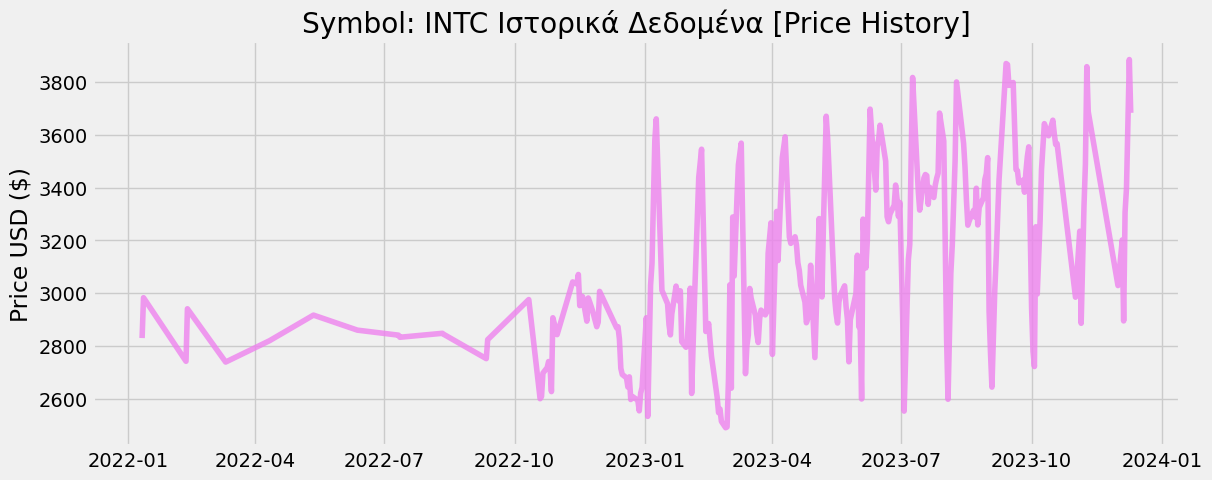

In [11]:
#Βήμα 3 | Plot Dataset
plot_dataset(dataset)

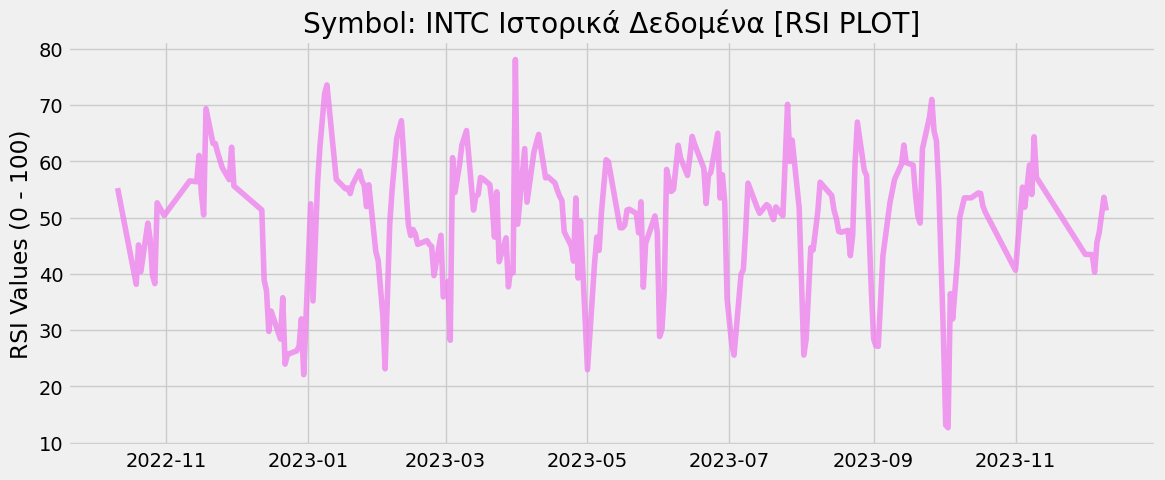

2022-01-12          NaN
2022-02-11          NaN
2022-02-12          NaN
2022-03-11          NaN
2022-04-11          NaN
                ...    
2023-12-05    40.298507
2023-12-06    45.605641
2023-12-07    47.407777
2023-12-09    53.611485
2023-12-10    51.256174
Name: Price, Length: 251, dtype: float64

In [12]:
#Βήμα 4 | Relative Strength Index (RSI) Calculation
rsi_result = rsi_indicator(dataset)
rsi_result

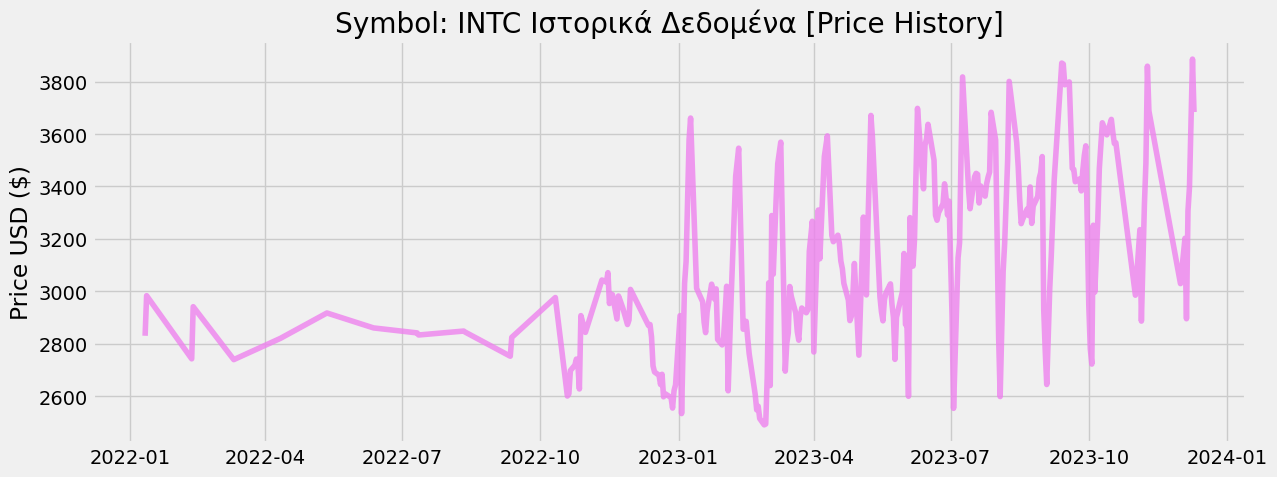

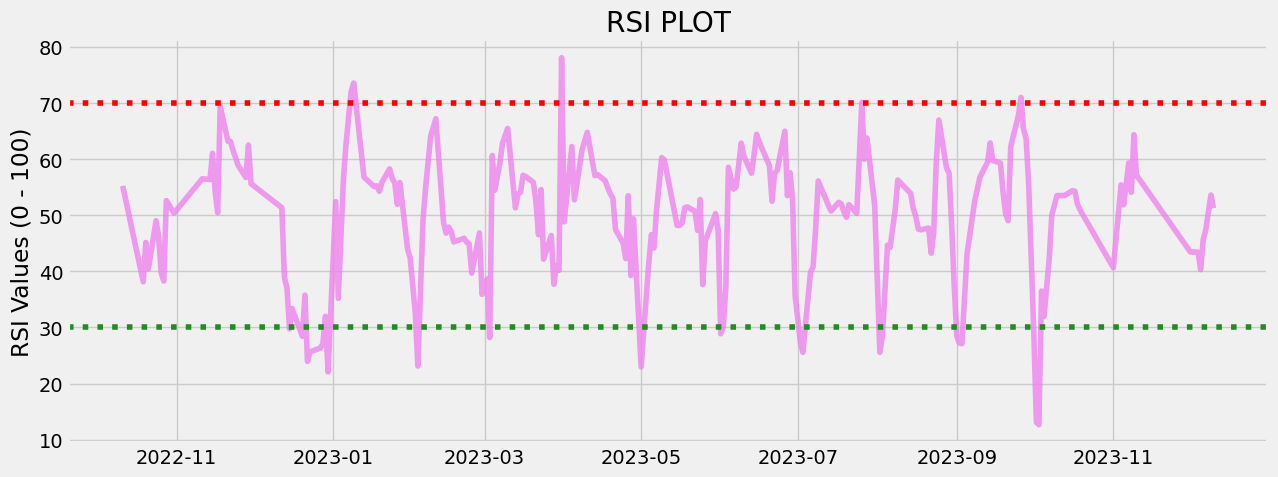

In [13]:
#Βήμα 5| PRICE (adj close) and RSI total Plot Analysis
total_plot_rsi(dataset,rsi_result)

In [14]:
#Βήμα 6| RSI Signals (Buy or Sell)
signal_buy, signal_sell = rsi_signals_buy_sell(dataset,rsi_result)

In [15]:
#Βήμα 7| RSI Signal 'Buy'
signal_buy

RSI_VALUES SIGNALS
2022-12-15   29.772727     buy
2022-12-19   29.658793     buy
2022-12-20   28.427673     buy
2022-12-22   23.951286     buy
2022-12-23   25.679348     buy
2022-12-27   26.323120     buy
2022-12-28   27.116212     buy
2022-12-30   22.085890     buy
2023-02-03   23.128549     buy
2023-03-03   28.200192     buy
2023-05-01   22.967190     buy
2023-06-01   28.866525     buy
2023-07-02   27.547170     buy
2023-07-03   25.554259     buy
2023-08-02   25.565388     buy
2023-08-03   28.430837     buy
2023-09-01   28.436019     buy
2023-09-02   27.202073     buy
2023-09-03   27.114267     buy
2023-10-01   29.050633     buy
2023-10-02   13.116971     buy
2023-10-03   12.654925     buy

In [16]:
#Βήμα 8| RSI Signal 'Sell'
signal_sell

RSI_VALUES SIGNALS
2023-01-08   72.045680    sell
2023-01-09   73.583093    sell
2023-03-31   78.094303    sell
2023-07-26   70.132239    sell
2023-09-26   71.006254    sell